# Settlement Calculations of Embankments new

<div class="alert alert-warning" role="alert">
  Input grond informations. User needs to manully type the information of each layer into the "layer" section below. Each pair of "{...}" stores the information of one layer. The layer information should be input sequentially from top to bottom. User can remove or add layers as needed by deleting or adding "{...}". Then click "Cell -> Run all" to run the whole pipline of the program. 
</div>

In [1]:
import json

ground_info = {
  "ground_elevation": 10,
  "slope_a": 15,
  "surcharge_elevation": 7,
  "surcharge_weight": 120,
  "ground_water_depth": 10.4,
  "layers": [
    {"soil_type":"SM \nML \nSC \nML", "thickness": 10.4, 
     "effective_unit_weight": 120, "CR": 0.01, "RR": 5e-4, "OCR": 1.5},
    
    {"soil_type":"SP", "thickness": 1.6, 
     "effective_unit_weight": 57.6, "CR": 0.01, "RR": 5e-4, "OCR": 1},
    
    {"soil_type":"SP", "thickness": 2.5, 
     "effective_unit_weight": 57.6, "CR": 0.01, "RR": 5e-4, "OCR": 1},
    
    {"soil_type":"ML", "thickness": 5, 
     "effective_unit_weight": 56.6, "CR": 0.16, "RR": 0.041, "OCR": 1},
    
    {"soil_type":"SP-SM", "thickness": 5, 
     "effective_unit_weight": 57.6, "CR": 0.01, "RR": 5e-4, "OCR": 1},
    
    {"soil_type":"ML \nML \nMH", "thickness": 15, 
     "effective_unit_weight": 57.6, "CR": 0.16, "RR": 0.041, "OCR": 1},
    
    {"soil_type":"SP", "thickness": 20, 
     "effective_unit_weight": 56.6, "CR": 0.01, "RR": 5e-4, "OCR": 1},
    
    {"soil_type":"ML", "thickness": 15, 
     "effective_unit_weight": 56.6, "CR": 0.16, "RR": 0.041, "OCR": 1},
    
    {"soil_type":"CL \nSM \nCH", "thickness": 26, 
     "effective_unit_weight": 67.6, "CR": 0.001, "RR": 1e-4, "OCR": 1},
    
    {"soil_type":"SM \nSP", "thickness": 9, 
     "effective_unit_weight": 67.6, "CR": 0.001, "RR": 1e-4, "OCR": 1}
            ]
          }

with open('ground_info.json', 'w') as outfile:
    json.dump(ground_info , outfile)

All the supporting functions are archived in this section. User can click the "+" button to review the calculating procedures. In most cases, user does not need to modify this seciton. 

This calculation based on the available laboratory consolidation data at HA-213 site. Fill height = 5 ft, fill unit weight
= 120 pcf. The Over Consolidation Ratio (OCR) is assuemed to be 1 in the calculation. But the Python code provided
in this section is able to solve the primary consolidation when the OCR > 1 base on the equation 8-13, 8-17, and 8-19
in the “AN INTRODUCTION TO GEOTECHNICAL ENGINEERING,” BY R.D. HOLTZ & W.D. KOVACS.
As shown in the figure, the calculation result is directly plotted on the Haley&Aldrich template. The height of the
plot of each soil layer is scaled according to the ratio of the soil layer thickness to the total calculation depth. And the
teoretical ground surface settlement curve is plotted on the right side to help engineers avoid uneven settlement.

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
import json
from hapy.plotting import HCFigure
from hapy.embankment_settle import embankment_settle as es

import os
import sys
import datetime as datetime
import numpy as np

ModuleNotFoundError: No module named 'hapy'

c:\users\hehez\onedrive\ha_internship\design-handbook\venv\lib\site-packages\hapy\embankment_settle\embankment_settle.py:224: UserWarning: Attempting to set identical left == right == 1 results in singular transformations; automatically expanding.
  soilAx.set_xlim([1,1])


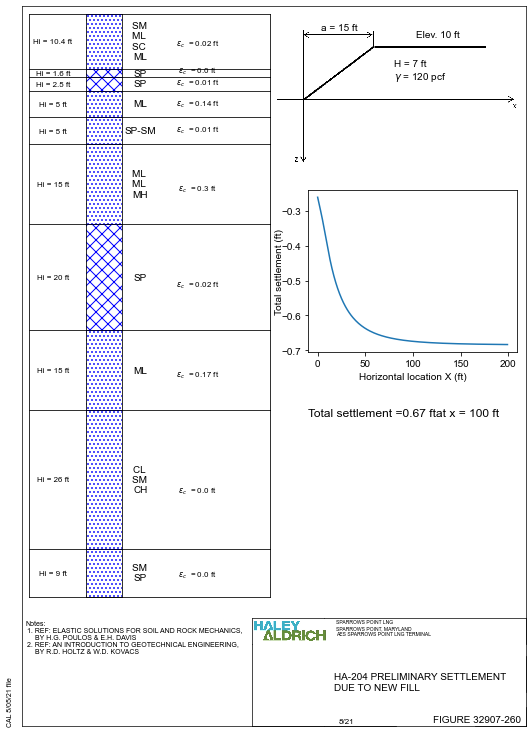

In [3]:
# The title and the note are automatically wrapped by default.
# User can add '\n' if the automatic wrapped text is not satisfying. 
# The title in this example is manually wrapped (the '\n' before 'DUE')

if __name__ == '__main__':
    # add lorem ipsum notes
    # print(__file__)
    asdf = HCFigure(style = 'ha',
                  title="HA-204 PRELIMINARY SETTLEMENT \nDUE TO NEW FILL",
                  author='Cal',
                  date=datetime.datetime.now(),
                  filename='file',
                  size=[8.5, 11],
                  orientation='p',
                  city='Sparrows Point',
                  state='Maryland',
                  sitename='aes Sparrows point Lng Terminal',
                  prjnum='XXXX-XX',
                  prjname='Sparrows Point LNG',
                  fignum='32907-260',
                  note=["REF: ELASTIC SOLUTIONS FOR SOIL AND ROCK MECHANICS, BY H.G. POULOS & E.H. DAVIS",
                        "REF: AN INTRODUCTION TO GEOTECHNICAL ENGINEERING, BY R.D. HOLTZ & W.D. KOVACS"]
                  )
    
    with open("ground_info.json", "r") as read_file:
        ground_data = json.load(read_file)
        
    plot_range = [1.1, 2.3, 6.8, 8.1] # x, y of the lower left corner, dx, dy
    es.surcharge_plot(asdf, plot_range, ground_data) # the 'es' in the 'es.surcharge_plot' means it uses functions in 
                                                     # 'hapy.embankment_settlement'
    
    layer_num = len(ground_data["layers"])
    point_x = 100
    
    cal_sum =[]
    for layer_n in range(0, layer_num):
        # print(layer_calculaton(asdf, plot_range, ground_data, layer_n, point_x))
        cal_sum.append(es.layer_calculaton(asdf, plot_range, ground_data, layer_n, point_x))
    
    eps_total = 0
    for layer_n in range(0, layer_num):
        eps_total += cal_sum[layer_n][9]
        es.layer_plot(asdf, plot_range, ground_data, cal_sum, layer_n, layer_num)
    # print(cal_sum[9][:])
    es.deform_plot(asdf, plot_range, ground_data, layer_num)
    
    
    # plot the tables of total settlement at base of footing
    totalsettleAx = asdf.addPlotAxes([0.6, 0.25, 0.3, 0.2])
    totalsettleAx.axis('tight')
    totalsettleAx.axis('off')
    # totalsettleAx.set_title('Total Settlement at Calculation Point')
    totalsettleAx.text(-0.06, 0.05, 'Total settlement =' + str(round(eps_total,2)) + ' ft' + 'at x = ' + str(point_x) + ' ft', 
                       ha='left', va='center', fontsize=12)
    

    asdf.add_text()
    asdf.saveHCFigure("embankment_settle.pdf")